In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("OpenCV Version : {} ".format(cv2.__version__))

OpenCV Version : 3.3.0 


# Problem 1 - Harris Corner Detection

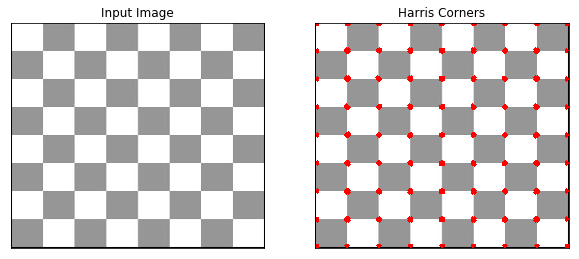

True

In [4]:
img1 = cv2.imread('chessboard.jpg')
# create copy
img_disp = img1.copy()

# Grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Sobel x-axis kernel
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")


def convolve(f, h):
    if h.shape[0] % 2 != 1 or h.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    img_height = f.shape[0]
    img_width = f.shape[1]
    pad_height = h.shape[0] // 2
    pad_width = h.shape[1] // 2
    # Allocate result image.
    pad = ((pad_height, pad_height), (pad_height, pad_width))
    g = np.empty(f.shape, dtype=np.float64)
    f = np.pad(f, pad, mode='constant', constant_values=0)
    # Do convolution
    for i in np.arange(pad_height, img_height+pad_height):
        for j in np.arange(pad_width, img_width+pad_width):
            roi = f[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            g[i - pad_height, j - pad_width] = (roi*h).sum()
            
    if (g.dtype == np.float64):
        h = h / 255.0 
        h = (h*255).astype(np.uint8)
    else:
        g = g + abs(np.amin(g))
        g = g / np.amax(g)
        g = (g*255.0)

    return g


dx = convolve(img1_gray, SOBEL_X)

dy = convolve(img1_gray, SOBEL_Y)



dx2 = np.square(dx)
dy2 = np.square(dy)
dxdy = dx*dy

g_dx2 = convolve(dx2, GAUSS)
g_dy2 = convolve(dy2, GAUSS)
g_dxdy = convolve(dxdy, GAUSS)
                      
alpha = 0.12

harris = g_dx2*g_dy2 - np.square(g_dxdy) - alpha*np.square(g_dx2 + g_dy2)

cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)


# set a threshold
thres = 0.6
# find all points above threshold
loc = np.where(harris >= thres)
# loop though the points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    cv2.circle(img_disp, pt, 3, (255, 0, 0), -1)











# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img1_gray, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite("output/q1.png", cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB))



# Problem 2 - Panoramic Images